In [3]:
import os
import scipy.io as sio
import numpy as np
import math
from scipy.interpolate import interp1d

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
experiments = os.listdir('../../datasets/RawDataMats/')

In [5]:
def mod_data(path):
    data = sio.loadmat(path)
    
    voltage1 = data['vd'][:, 0]
    voltage2 = data['vq'][: ,0]
    speed = data['spd'][:, 0]
    current1 = data['id'][:, 0]
    current2 = data['iq'][:, 0]
    torque = data['trq'][:, 0]
    it = data['it'][:, 0]
    vt = data['vt'][:, 0]
    
    v1f = interp1d(vt, voltage1)
    v2f = interp1d(vt, voltage2)
    spdf = interp1d(vt, speed)
    trqf = interp1d(vt, torque)
    c1f = interp1d(it, current1)
    c2f = interp1d(it, current2)
    
    if 'NoLM_SpeedVariations2.mat' not in path:
        nvoltage1 = v1f(it[1:])
        nvoltage2 = v2f(it[1:])
        nspeed = spdf(it[1:])
        ntorque = trqf(it[1:])
        ncurrent1 = c1f(it[1:])
        ncurrent2 = c2f(it[1:])
        time = it[1:]
    else:
        it = it[:40977]
        nvoltage1 = v1f(it)
        nvoltage2 = v2f(it)
        nspeed = spdf(it)
        ntorque = trqf(it)
        ncurrent1 = c1f(it)
        ncurrent2 = c2f(it)
        time = it
        
        
    dataset_float = np.vstack((nvoltage1, nvoltage2, nspeed, ncurrent1, ncurrent2, ntorque, time))
    dataset_integer = np.vstack((np.floor(nvoltage1 * 2**15 / 921), np.floor(nvoltage2 * 2**15 / 921), 
                                 np.floor(nspeed * 2**15 / 250), np.floor(ncurrent1 * 2**12 / 33.5), 
                                 np.floor(ncurrent2 * 2**12 / 33.5), np.floor(ntorque * 2**10 / 25), time))
    index_quant_map = {'Voltage1':0,'Voltage2':1,'Speed':2,'Current1':3,'Current2':4,'Torque':5,'Time':6}

    return dataset_float.astype(np.float32), dataset_integer.astype(np.int16), index_quant_map


LM10.mat
(7, 10248) (7, 10248)


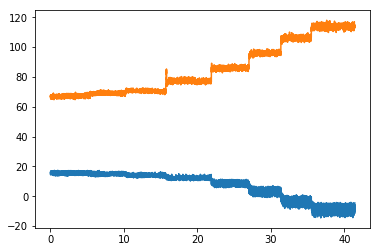

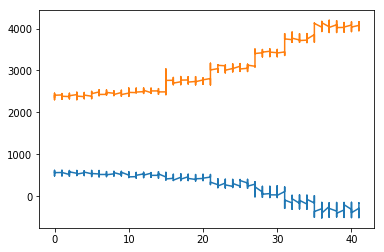

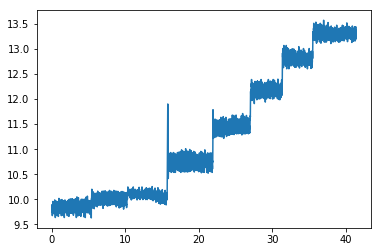

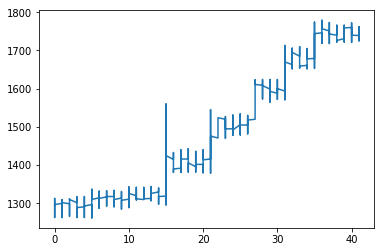

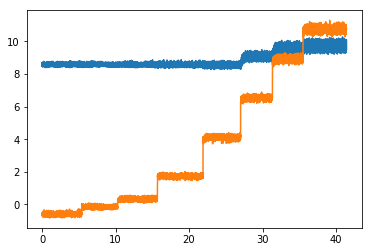

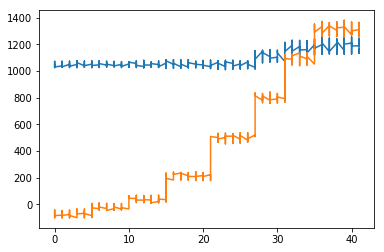

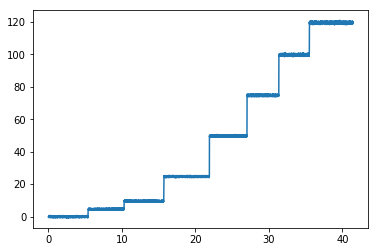

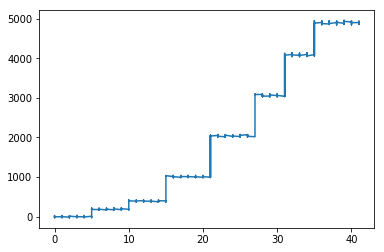

LM30.mat
(7, 10241) (7, 10241)


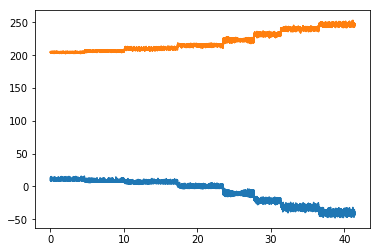

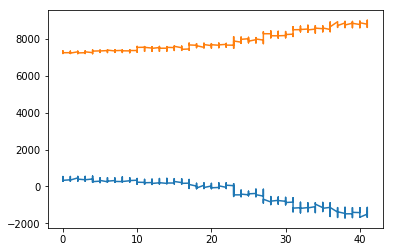

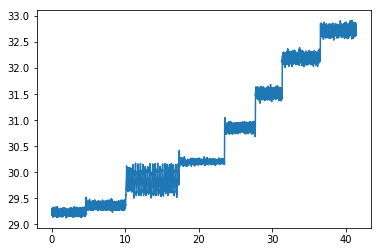

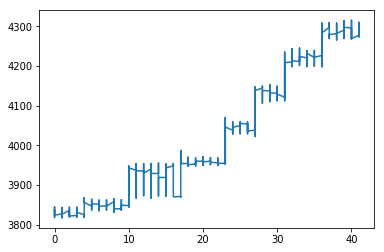

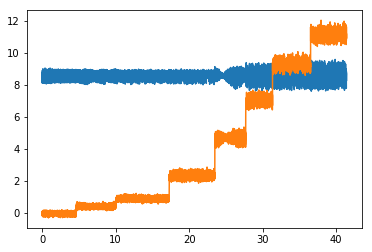

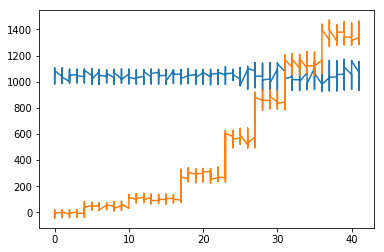

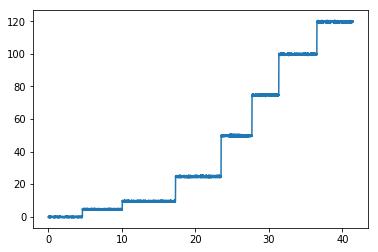

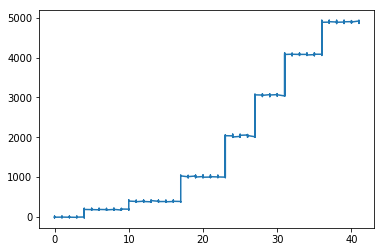

LM60_TroqueSteps.mat
(7, 51227) (7, 51227)


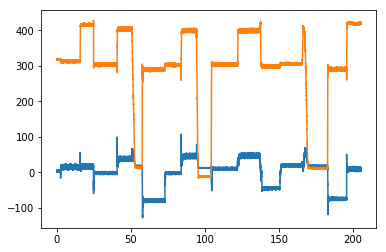

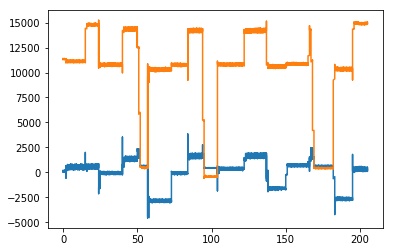

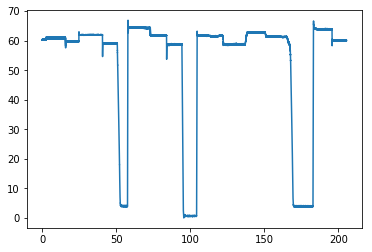

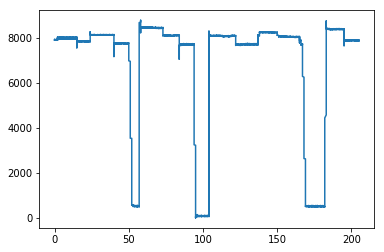

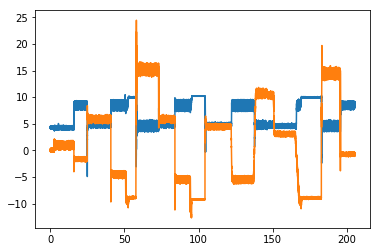

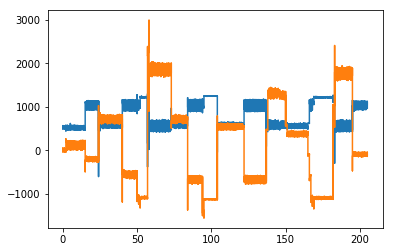

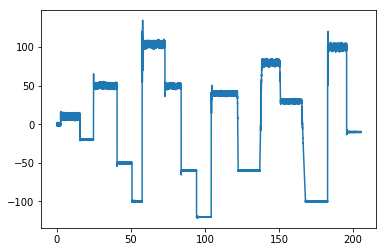

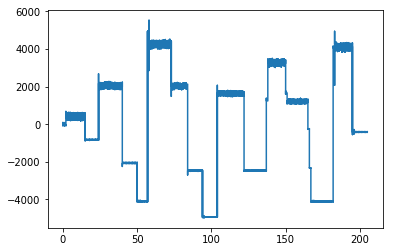

LM50.mat
(7, 10250) (7, 10250)


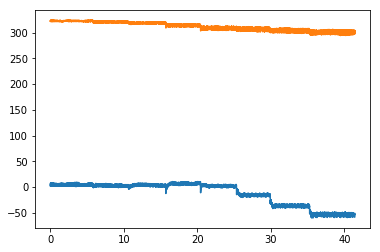

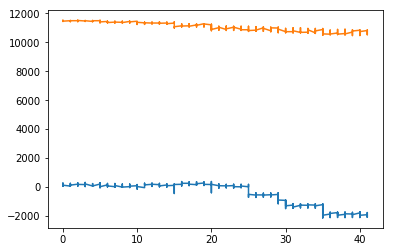

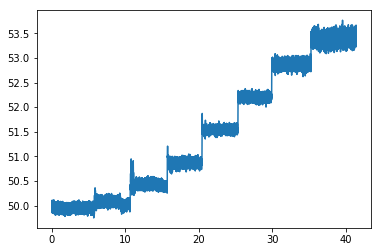

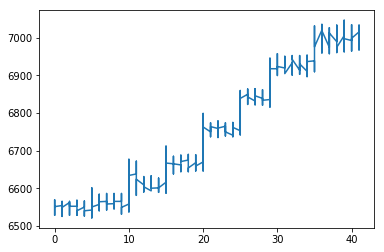

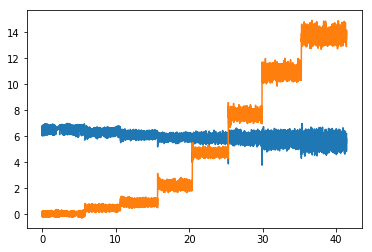

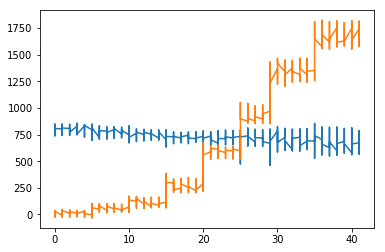

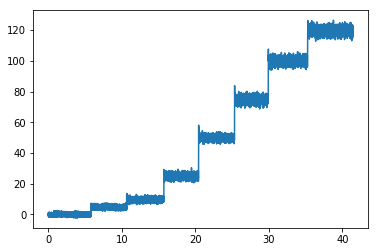

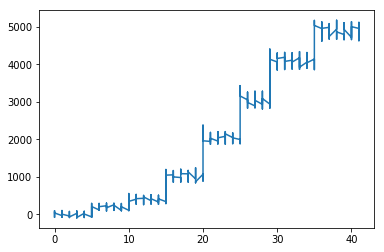

NoLM.mat
(7, 10255) (7, 10255)


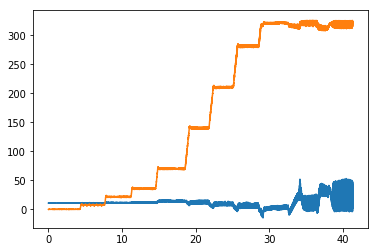

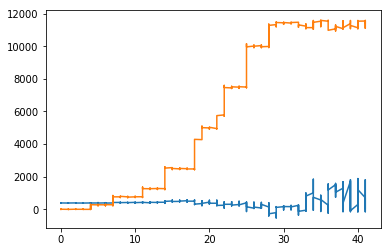

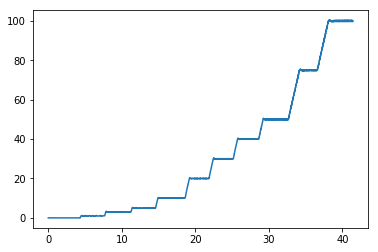

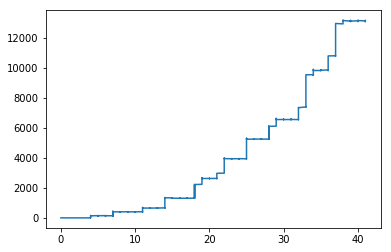

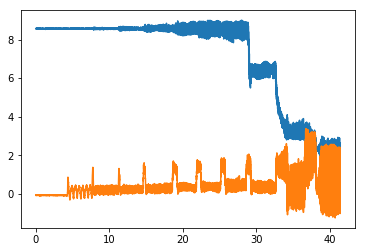

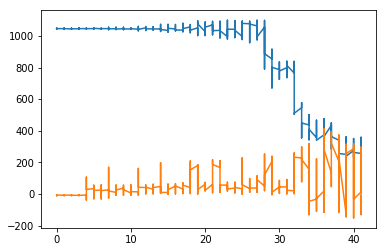

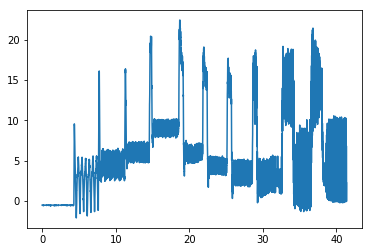

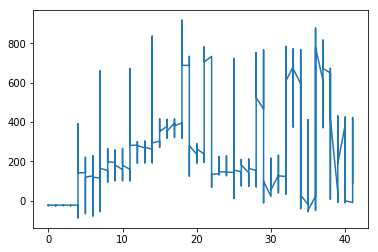

NoLM_SpeedVariations.mat
(7, 51244) (7, 51244)


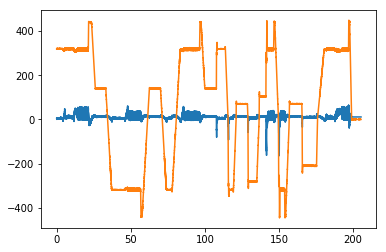

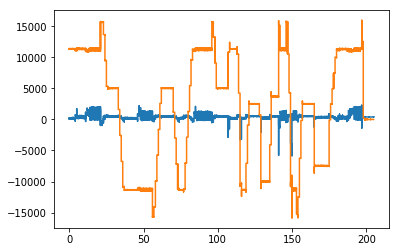

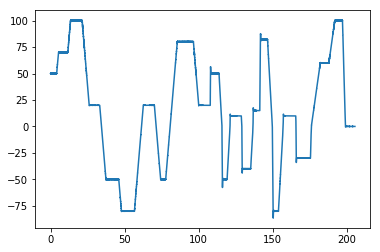

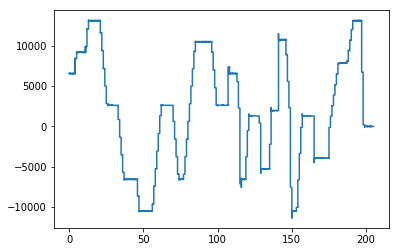

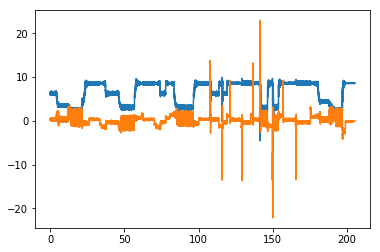

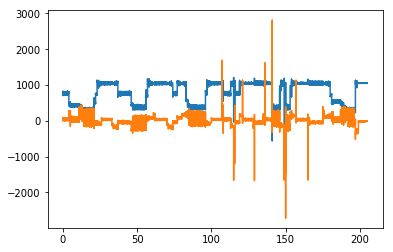

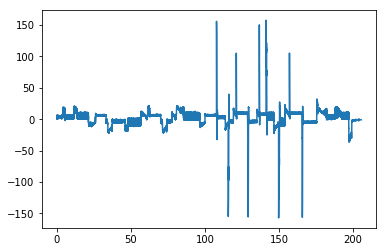

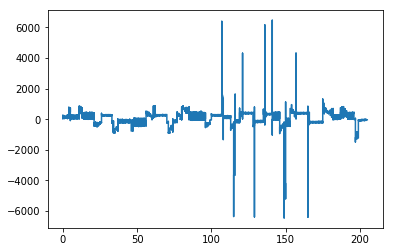

LM68.mat
(7, 10301) (7, 10301)


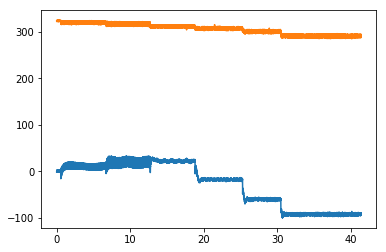

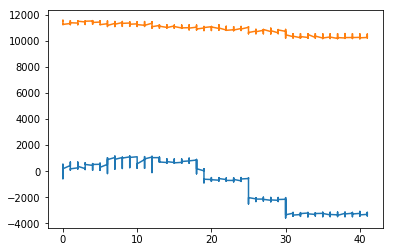

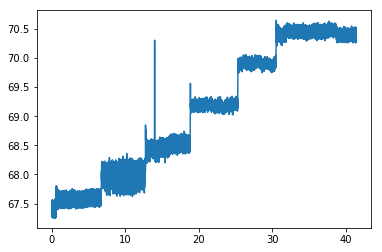

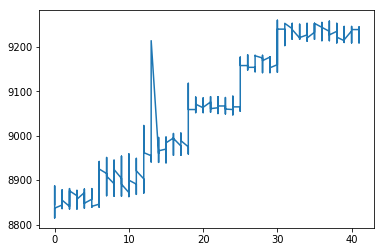

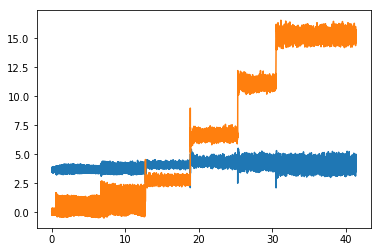

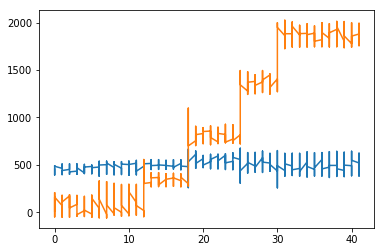

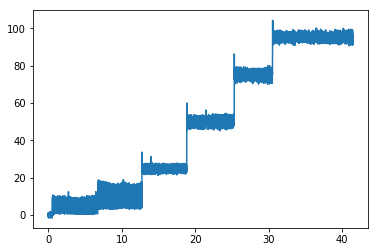

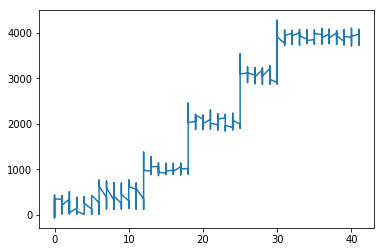

NoLM_SpeedVariations2.mat
(7, 40977) (7, 40977)


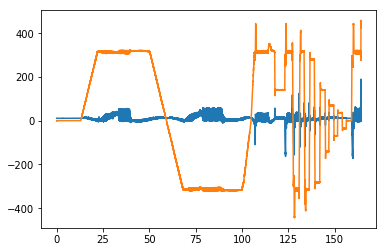

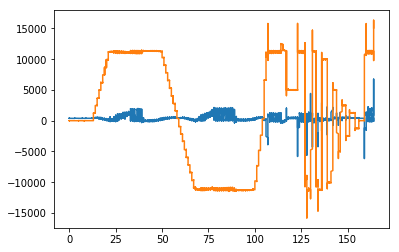

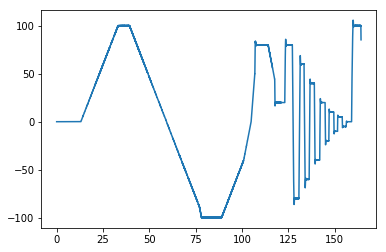

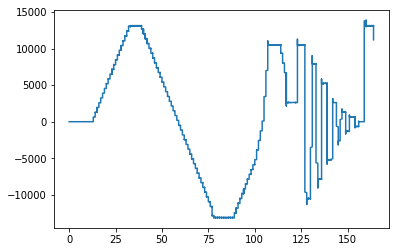

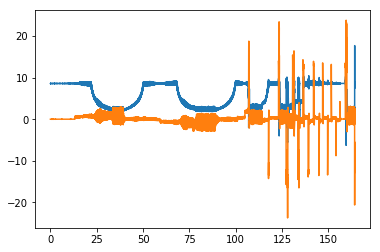

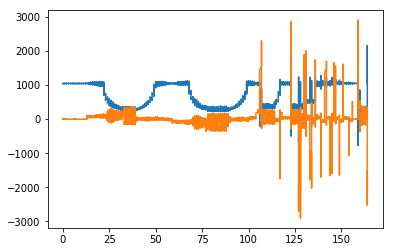

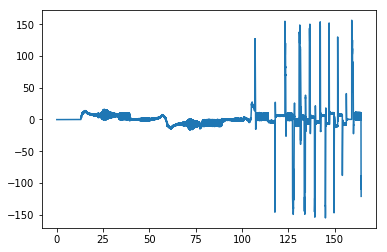

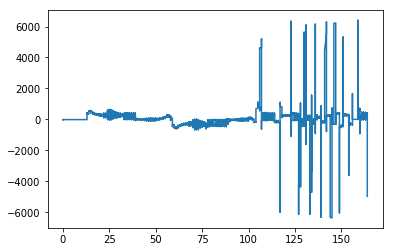

LM20_TorqueSteps.mat
(7, 51224) (7, 51224)


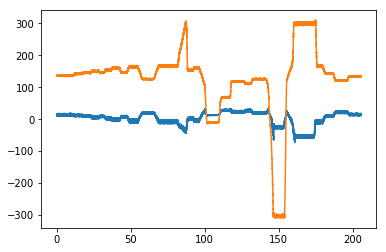

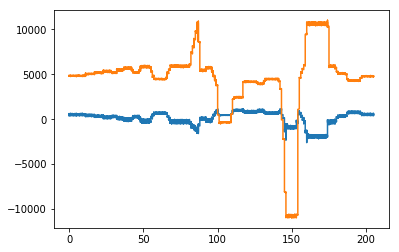

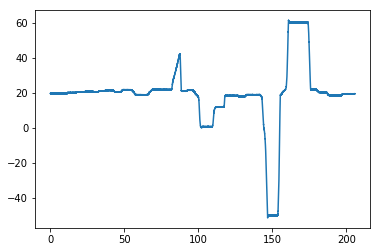

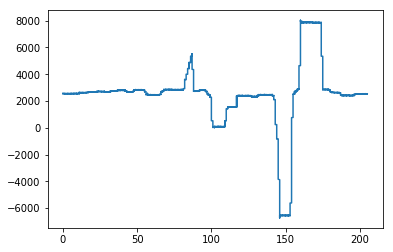

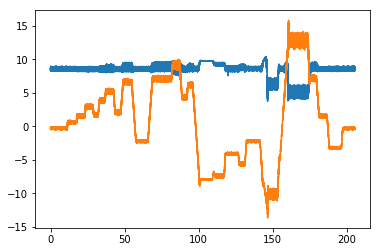

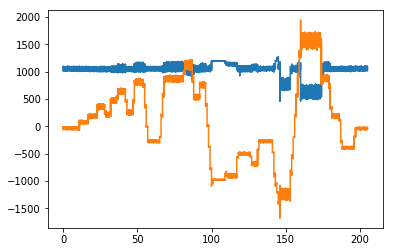

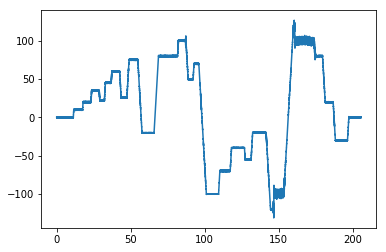

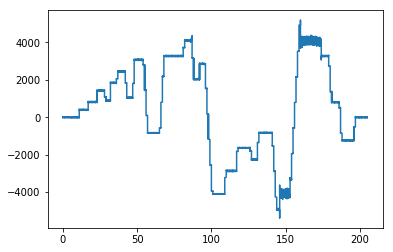

LM45_TorqueSteps.mat
(7, 51365) (7, 51365)


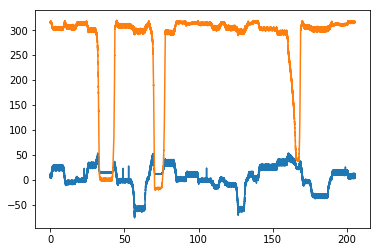

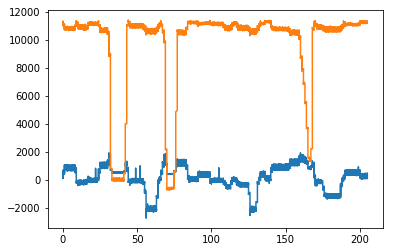

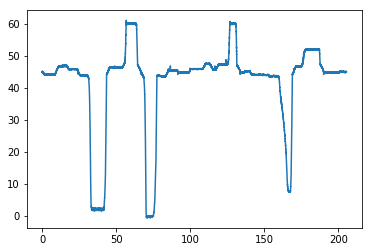

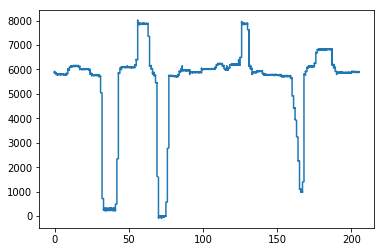

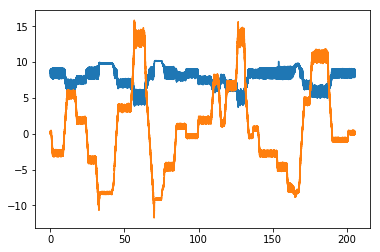

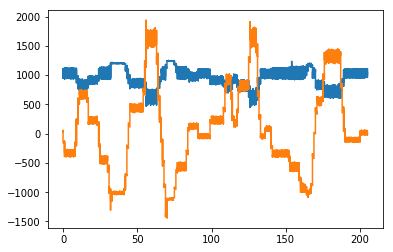

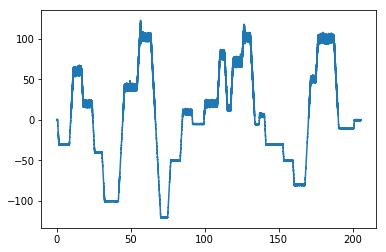

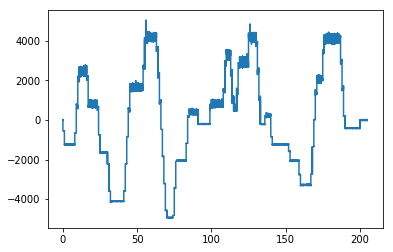

In [8]:
integer_dataset = {}
v1s = []
v2s = []
ss = []
c1s = []
c2s = []
ts = []

for experiment in experiments:
    print (experiment)
    data_float, data_integer, index_quant_map = mod_data('../../datasets/RawDataMats/' + experiment)
    print (data_float.shape, data_integer.shape)
#     for x in range(7):
#         print (data_float[x,:].min(), data_float[x,:].max(), data_integer[x,:].min(), data_integer[x,:].max())
    
    v1s.append(data_integer[0,:].min())
    v1s.append(data_integer[0,:].max())
    v2s.append(data_integer[1,:].min())
    v2s.append(data_integer[1,:].max())
    ss.append(data_integer[2,:].min())
    ss.append(data_integer[2,:].max())
    c1s.append(data_integer[3,:].min())
    c1s.append(data_integer[3,:].max())
    c2s.append(data_integer[4,:].min())
    c2s.append(data_integer[4,:].max())
    ts.append(data_integer[5,:].min())
    ts.append(data_integer[5,:].max())
    
    plt.plot(data_float[6,:], data_float[0,:])
    plt.plot(data_float[6,:], data_float[1,:])
    plt.show()
    plt.plot(data_integer[6,:], data_integer[0,:])
    plt.plot(data_integer[6,:], data_integer[1,:])
    plt.show()
    
    plt.plot(data_float[6,:], data_float[2,:])
    plt.show()
    plt.plot(data_integer[6,:], data_integer[2,:])
    plt.show()
    
    plt.plot(data_float[6,:], data_float[3,:])
    plt.plot(data_float[6,:], data_float[4,:])
    plt.show()
    plt.plot(data_integer[6,:], data_integer[3,:])
    plt.plot(data_integer[6,:], data_integer[4,:])
    plt.show()
    
    plt.plot(data_float[6,:], data_float[5,:])
    plt.show()
    plt.plot(data_integer[6,:], data_integer[5,:])
    plt.show()
    
    integer_dataset[experiment] = data_integer

In [30]:
import pickle

In [32]:
fout = open('../../datasets/raw_data_integer.pkl','wb')
pickle.dump(integer_dataset, fout)
fout.close()

In [9]:
print (min(v1s), max(v1s))
print (min(v2s), max(v2s))
print (min(ss), max(ss))
print (min(c1s), max(c1s))
print (min(c2s), max(c2s))
print (min(ts), max(ts))

-6146 6753
-15860 16335
-13149 13867
-971 2159
-2900 2988
-6442 6456
